# Weekly activities
1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?
2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.
3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

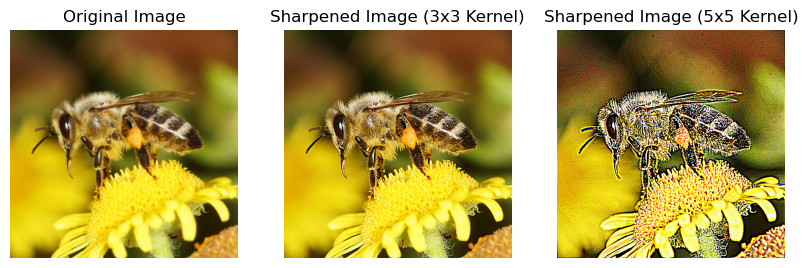

In [6]:
# Ques 1 

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('images/native-bee.png', cv.IMREAD_COLOR)

# Define the 3x3 sharpening kernel
kernel_3x3 = np.array([[ 0, -1,  0],
                       [-1,  5, -1],
                       [ 0, -1,  0]])

# Define the 5x5 sharpening kernel
kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, 25, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1]])

# Apply the kernels to the image
sharpened_3x3 = cv.filter2D(image, -1, kernel_3x3)
sharpened_5x5 = cv.filter2D(image, -1, kernel_5x5)

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Sharpened Image (3x3 Kernel)')
plt.imshow(cv.cvtColor(sharpened_3x3, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Sharpened Image (5x5 Kernel)')
plt.imshow(cv.cvtColor(sharpened_5x5, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

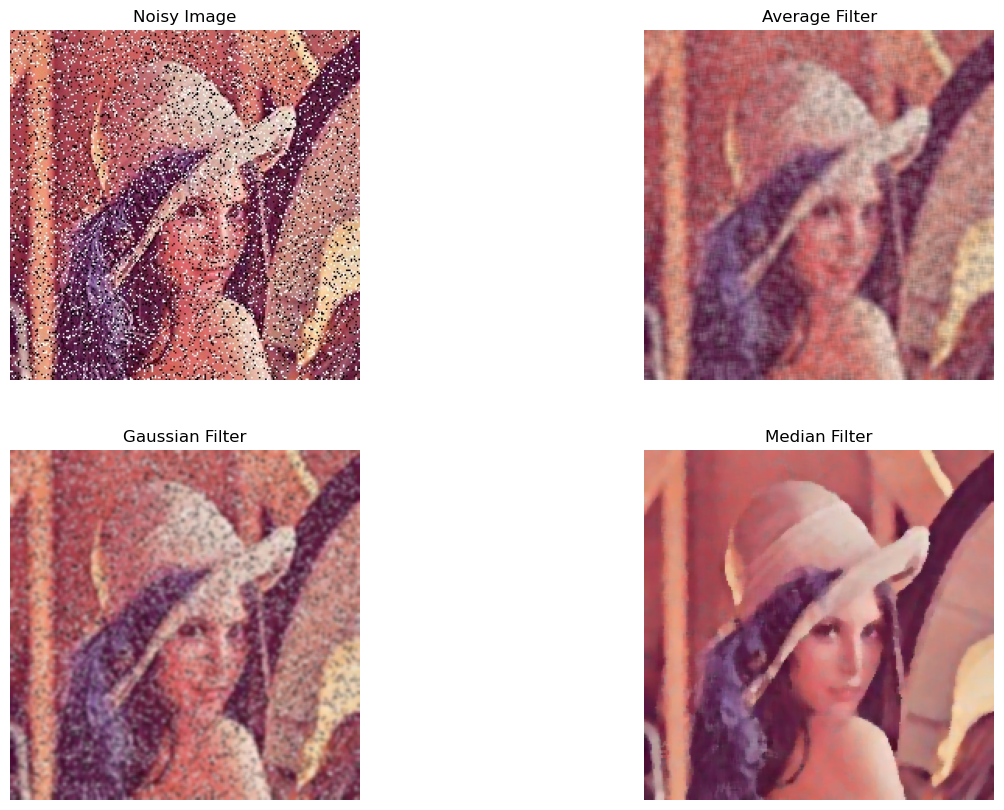

In [7]:
# Ques 2

# Load the image with noise
noisy_image = cv.imread('images/noise_lena.jpg', cv.IMREAD_COLOR)

# Apply average filter
average_filtered = cv.blur(noisy_image, (5, 5))

# Apply Gaussian filter
gaussian_filtered = cv.GaussianBlur(noisy_image, (5, 5), 0)

# Apply median filter
median_filtered = cv.medianBlur(noisy_image, 5)

# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.title('Noisy Image')
plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Average Filter')
plt.imshow(cv.cvtColor(average_filtered, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Gaussian Filter')
plt.imshow(cv.cvtColor(gaussian_filtered, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Median Filter')
plt.imshow(cv.cvtColor(median_filtered, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

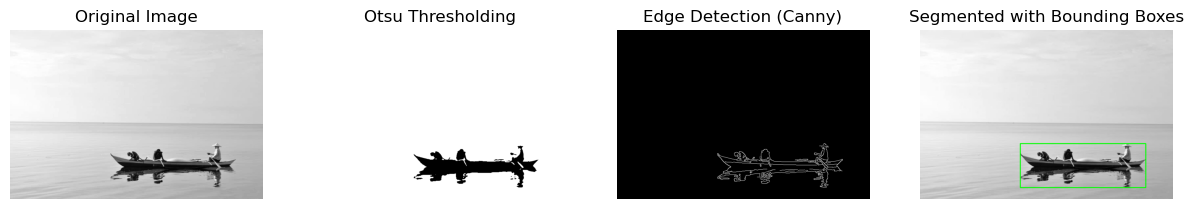

In [11]:
# Load the image
boat_image = cv.imread('images/boat.jpg', cv.IMREAD_GRAYSCALE)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv.GaussianBlur(boat_image, (5, 5), 0)

# Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Use Canny edge detection to find edges
edges = cv.Canny(blurred, threshold1=50, threshold2=150)

# Perform morphological operations to close gaps between edge segments
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
morph_edges = cv.morphologyEx(edges, cv.MORPH_CLOSE, kernel)

# Find contours from the morphed edges
contours, _ = cv.findContours(morph_edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Filter out small contours based on area to remove noise
min_contour_area = 100  # Adjust this value based on the image size and object sizes
filtered_contours = [c for c in contours if cv.contourArea(c) > min_contour_area]

# Draw bounding boxes around the detected regions
boat_with_bounding_boxes = cv.cvtColor(boat_image, cv.COLOR_GRAY2BGR)
for contour in filtered_contours:
    x, y, w, h = cv.boundingRect(contour)
    cv2.rectangle(boat_with_bounding_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the original, edge-detected, and segmented images with bounding boxes
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(boat_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Otsu Thresholding')
plt.imshow(otsu_thresh, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Edge Detection (Canny)')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Segmented with Bounding Boxes')
plt.imshow(cv.cvtColor(boat_with_bounding_boxes, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()